<h1>Project Deep Leaning Kelompok 5</h1>

<h3>
1. 2301861831 - Reyhan Nathanael<br>
2. 2301846414 - Nicholas Vigo Wardhana<br>
3. 2301888051 - Michael Febrianto Lu<br>
4. 2301817063 -Renaldy<br>
5. 2301864846 - Kevin Sam Andaria<br>
</h3>

#import library

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import cv2
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

#Read Dataset

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#Show train image

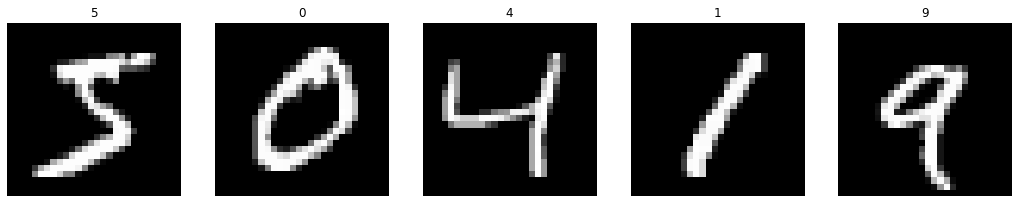

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(18,4))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.title(train_y[i])
  plt.imshow(train_x[i], cmap='gray', vmin=0, vmax=255)
  plt.axis('off')
plt.show()

#Normalize dataset

In [ ]:
train_norm = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_norm = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [ ]:
#normalize Y to categorial
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
#normalize x devided by 255 (intensity pixel)
train_norm = train_norm.astype('float32')
test_norm = test_norm.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

#Make Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

#Train Model

In [ ]:
epoch = 10
history = model.fit(train_norm, train_y, epochs=epoch, verbose=1, validation_split=0.3,batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 13s 9ms/step - loss: 0.3648 - accuracy: 0.8812 - val_loss: 0.0808 - val_accuracy: 0.9752
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1101 - accuracy: 0.9687 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 4/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0583 - val_accuracy: 0.9843
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 7/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0437 - val_a

#Accuracy and loss model

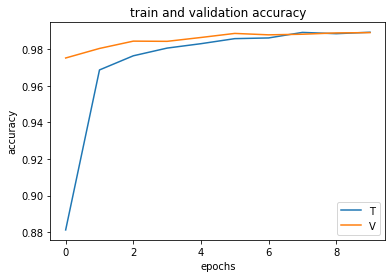

In [ ]:
train_accuracy = pd.DataFrame(history.history['accuracy'])
val_accuracy = pd.DataFrame(history.history['val_accuracy'])
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend('TV')
plt.title('train and validation accuracy')
plt.show()

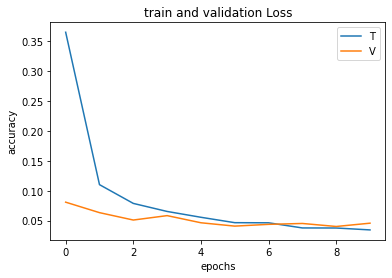

In [ ]:
train_accuracy = pd.DataFrame(history.history['loss'])
val_accuracy = pd.DataFrame(history.history['val_loss'])
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend('TV')
plt.title('train and validation Loss')
plt.show()

#Model Prediction

In [ ]:
predictions = (model.predict(test_norm) > 0.5).astype("int32")

#Classification Report

In [ ]:
report = classification_report(test_y,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Recall, Precision, F1-Score

In [ ]:

recall = recall_score(test_y,predictions,average='samples')
precision = precision_score(test_y,predictions,average='samples')
f1_score1 = f1_score(test_y,predictions,average='samples')

print("Recall Score Model: ",recall)
print("Precision Score Model: ",precision)
print("F1-Score Model: ",f1_score1)

Recall Score Model:  0.9901
Precision Score Model:  0.9901
F1-Score Model:  0.9901


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Inverse to_categorial

In [ ]:
predictions = [np.argmax(y, axis=None, out=None) for y in predictions]
test_y = [np.argmax(y, axis=None, out=None) for y in test_y]

#Confusion Matrix

In [ ]:
matrix=confusion_matrix(test_y, predictions)

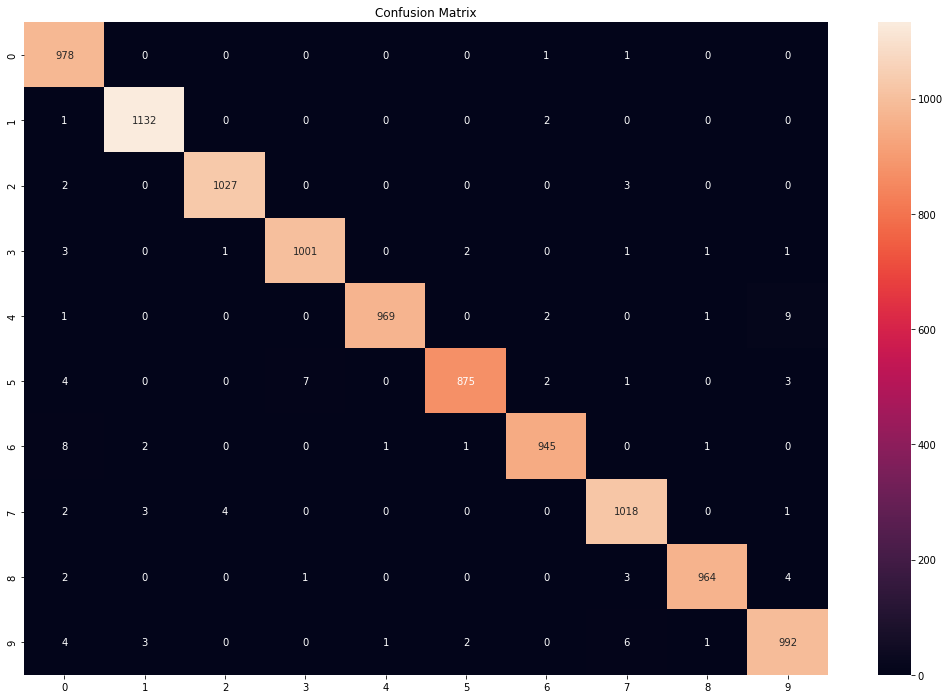

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "0123456789"],columns = [i for i in "0123456789"])
plt.figure(figsize = (18,12))
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True,fmt='g')

#Show Prediction Result

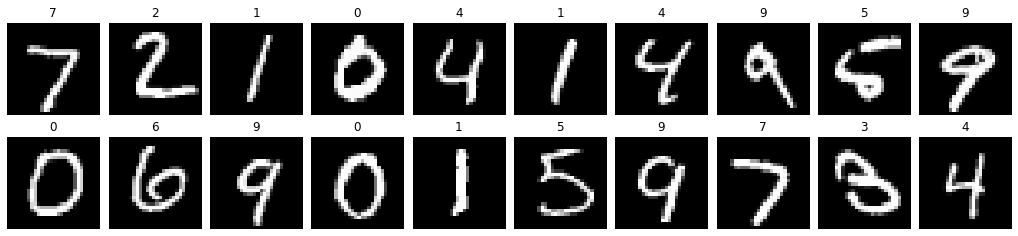

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(18,4))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(0,20):
  plt.subplot(2,10,i+1)
  plt.title(predictions[i])
  plt.imshow(test_x[i], cmap='gray', vmin=0, vmax=255)
  plt.axis('off')
plt.show()

#Making Live Input

##JS for live Input

In [ ]:
Square_Size = 256
Brush_Size = 15 
filename = "my_drawing"
filename = filename + ".png"

js_code = '''
<style>
  .colors-buttons div {
      width: 30px;
      height: 30px;
      margin: 2px;}
  div {
      display: flex;
  }
  canvas{border:1px solid black !important;}
</style>
<canvas id="myCanvas" width="%d" height="%d"></canvas>
<div class="colors-buttons">
  <div class="color" style="background-color: #FFFFFF;" id-color="#FFFFFF"></div>
</div>
<script>
  var canvas = document.querySelector('canvas')
  var ctx = canvas.getContext('2d')
  ctx.fillStyle = 'black';
  ctx.fillRect( 0, 0, canvas.width, canvas.height)
  var Brush_Size = %d
  var button = document.querySelector('button')
  var mouse = {x: 0, y: 0}
  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  })
  canvas.onmousedown = ()=>{
    ctx.beginPath()
    ctx.moveTo(mouse.x, mouse.y)
    
    canvas.addEventListener('mousemove', onPaint)
  }
  canvas.onmouseup = ()=>{
    canvas.removeEventListener('mousemove', onPaint)
  }
  var onPaint = ()=>{
    ctx.fillRect(mouse.x-( Brush_Size/2), mouse.y-(Brush_Size/2), Brush_Size, Brush_Size)
    ctx.stroke()
  }
  const colors = document.getElementsByClassName('color');
  Array.from(colors).forEach(color => {
      color.addEventListener('click', (event) => {
          const colorSelected = event.target.getAttribute('id-color');
          ctx.fillStyle = colorSelected;
      });
  });
    // FINISH BUTTON
  var data = new Promise(resolve=>{
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/jpg'))
    }
  })
</script>
'''

##Live Draw

In [ ]:
def draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size):
  display(HTML(js_code % (w, h, Brush_Size)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  if AttributeError:
    pass
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
  if button2.on_click(on_button_clicked2):
    pass
  

## Action for Reset Button
def on_button_clicked(b):
  with output:
    #display(HTML(canvas_html % ( w=$Square_Size, h=$Square_Size, Brush_Size=$Brush_Size)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
  return len(binary)
  

## Show Save Button & Save outputs
button = widgets.Button(description="Save")
button.on_click(on_button_clicked)
output = widgets.Output()
display(button, output)

## Show Canvas for the First Time
draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size)
print("Image Saved at")

Button(description='Save', style=ButtonStyle())

Output()

Image Saved at


##Preprocessing input

In [ ]:

img = cv2.imread('my_drawing.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(img,cmap='gray')
plt.axis("off")

In [ ]:
dim = (28, 28)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
img_norm = resized.reshape((1, 28, 28, 1))
img_norm = img_norm.astype('float32')
img_norm = img_norm / 255.0

#Predict the Input

In [ ]:
prediction = (model.predict(img_norm) > 0.5).astype("int32")

In [ ]:
prediction = [np.argmax(y, axis=None, out=None) for y in prediction]

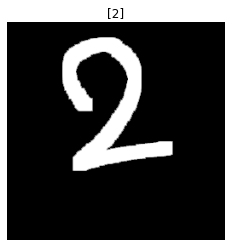

In [ ]:
plt.title(prediction)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()